In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


Kutubxonalarni chaqirish

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.model_selection import cross_val_score

Malumotni yuklash va o'rganish

In [3]:
data = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv', index_col=0)
data.head(7)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
6,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,2,...,5,4,5,5,4,4,5,0,0.0,0
7,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,1,...,5,1,4,4,5,4,5,2,5.0,1


In [4]:
data.info() # 1 ta ustunda nan qiymat bor

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,39.375100,14.897959,7.0,27.0,40.0,51.00,80.0
Flight Distance,10000.0,1229.556200,1022.281958,31.0,421.0,863.5,1806.75,4983.0
Inflight wifi service,10000.0,2.780200,1.362745,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,10000.0,3.065100,1.527316,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,10000.0,2.797800,1.421168,0.0,2.0,3.0,4.00,5.0
Gate location,10000.0,2.981000,1.283278,1.0,2.0,3.0,4.00,5.0
Food and drink,10000.0,3.214500,1.333217,0.0,2.0,3.0,4.00,5.0
Online boarding,10000.0,3.349100,1.352779,0.0,2.0,4.0,4.00,5.0
Seat comfort,10000.0,3.491400,1.311220,0.0,3.0,4.0,5.00,5.0
Inflight entertainment,10000.0,3.402900,1.331822,0.0,2.0,4.0,5.00,5.0


In [6]:
# nan qiymatlar sonini ko'rish
data.isnull().sum() 

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

Malumotlarga ishlov berish

In [7]:
data['Type of Travel'].value_counts()

Type of Travel
Business travel    7079
Personal Travel    2921
Name: count, dtype: int64

In [8]:
# malumotlar orosidagi corrilatsiyani ko'rish 
# data.corrwith(data['satisfaction']).abs().sort_values(ascending=False)

In [9]:
# corrilatsiya past bo'lgan ustunlarni tashlab yuboramiz
data.drop(['Gender', 'Gate location', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient'], axis=1, inplace=True)

Visualisation 

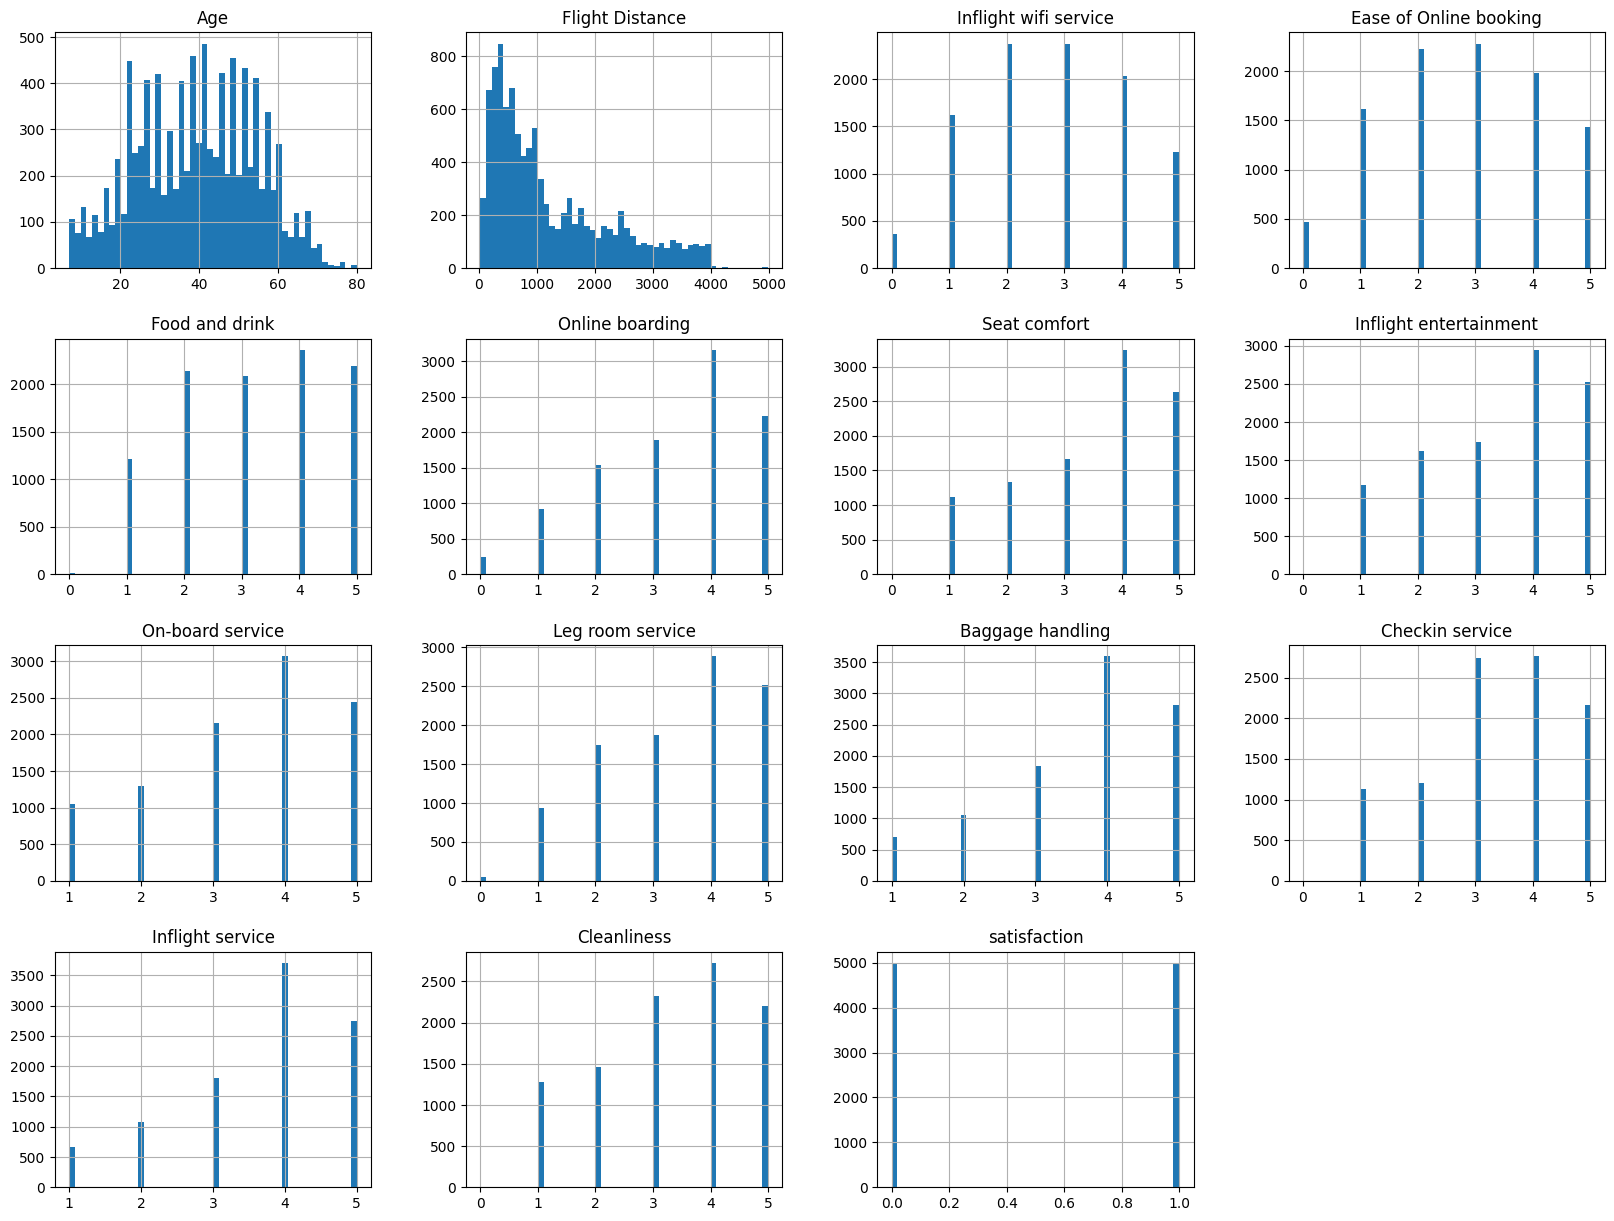

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Preparetion for ML

In [11]:
# df ni train test qismga ajratish
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2 , random_state=42)

#Lebelni y ga saqlab aratib olish
X_train = train_set.drop('satisfaction', axis=1)
Y = train_set['satisfaction'].copy()
Y_test = test_set['satisfaction'].copy()

Pipeline qurish

In [12]:
# sonlar bilan ishlovchi pipeline
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

num_attribs = list(X_train.drop(['Customer Type', 'Type of Travel', 'Class'], axis=1))
cat_attribs = ['Customer Type', 'Type of Travel', 'Class']
    
# full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])
    
# X_train ni full pipelinedan o'tkazamiz
X_prepared = full_pipeline.fit_transform(X_train)

Machine Learning

Random Forest

In [13]:
RF_model = RandomForestClassifier()
RF_model.fit(X_prepared, Y)

RandomForestClassifier()

Modelni baholash

In [14]:
X_test = test_set.drop('satisfaction', axis=1)
X_test_prepared = full_pipeline.transform(X_test)
y_predict = RF_model.predict(X_test_prepared)

print(classification_report(Y_test, y_predict))
print("RandomForest's Accuracy: ", metrics.accuracy_score(Y_test, y_predict))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1002
           1       0.97      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

RandomForest's Accuracy:  0.9515


In [15]:
print("Cross-Validation-Score :",(cross_val_score(RF_model, X_prepared, Y, cv=5,scoring='roc_auc').mean())*100)

Cross-Validation-Score : 98.89390550351447


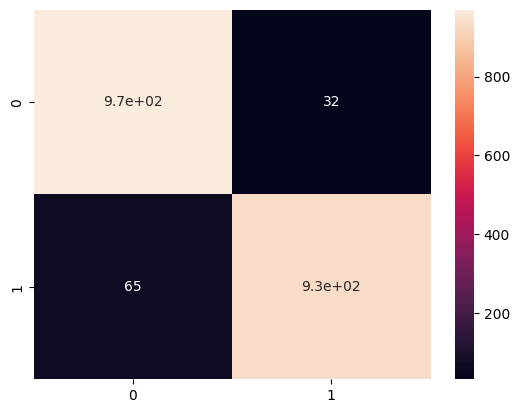

In [16]:
sns.heatmap(confusion_matrix(Y_test, y_predict), annot=True)
plt.show()

In [17]:
# k-NN
knn = KNeighborsClassifier()

knn.fit(X_prepared, Y)

KNeighborsClassifier()

In [18]:
# baholash jaccard_score

jaccard_score(Y_test, y_predict)

0.9058252427184466

LGBMClassifier algorithm

In [19]:
LGB_model = lgb.LGBMClassifier()
LGB_model.fit(X_prepared, Y)

[LightGBM] [Info] Number of positive: 4002, number of negative: 3998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500250 -> initscore=0.001000
[LightGBM] [Info] Start training from score 0.001000


LGBMClassifier()

In [20]:
y_predict = LGB_model.predict(X_test_prepared)

print(classification_report(Y_test, y_predict))
print("LGB's Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1002
           1       0.96      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

LGB's Accuracy:  0.9465


Eng yaxshi natija Random Forest algaritmida Cross-Validation-Score : 98.89995238364142

In [21]:
test_data = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv', index_col=0)

# test datani pipelinedan o'tkazamiz
X_test_prepared = full_pipeline.transform(test_data)

# RF model orqali predict qilamiz
y_predicted = RF_model.predict(X_test_prepared)

solution_data = pd.DataFrame({"id" : np.arange(1, len(y_predicted)+1), 'satisfaction': y_predicted})

In [22]:
solution_data.to_csv('submission.csv', index=False)